In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 데이터를 불러온다.

In [3]:
df1 = pd.read_excel('data/머신러닝과제 학습데이터.xlsx')
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
713,0,134,58,20,291,26.4,0.352,21,0
714,3,102,74,0,0,29.5,0.121,32,0
715,7,187,50,33,392,33.9,0.826,34,1
716,3,173,78,39,185,33.8,0.970,31,1


### 데이터 전처리

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               718 non-null    int64  
 1   Glucose                   718 non-null    int64  
 2   BloodPressure             718 non-null    int64  
 3   SkinThickness             718 non-null    int64  
 4   Insulin                   718 non-null    int64  
 5   BMI                       718 non-null    float64
 6   DiabetesPedigreeFunction  718 non-null    float64
 7   Age                       718 non-null    int64  
 8   Outcome                   718 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 50.6 KB


In [5]:
# 입력과 결과로 나눈다.
X = df1.drop('Outcome', axis=1)
y = df1['Outcome']

In [6]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)

In [7]:
print(X)
print(y)

[[ 0.63977559  0.84704983  0.16677275 ...  0.21698733  0.45296293
   1.43398388]
 [-0.84778553 -1.11292009 -0.1379164  ... -0.66123649 -0.36962037
  -0.18354614]
 [ 1.23480003  1.935922   -0.23947945 ... -1.07525629  0.58707977
  -0.09841298]
 ...
 [ 0.93728781  2.06036454 -0.9504208  ...  0.2546255   1.04605741
   0.07185333]
 [-0.25276108  1.62481567  0.4714619  ...  0.24207944  1.4752313
  -0.18354614]
 [ 1.82982448 -0.83292439  0.16677275 ... -1.1003484   0.35759095
   1.94478283]]
0      1
1      0
2      1
3      0
4      1
      ..
713    0
714    0
715    1
716    1
717    0
Name: Outcome, Length: 718, dtype: int64


### 기본 모델을 통한 교차 검증

In [8]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [9]:
# 검증할 모델들 생성
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = [model1, model2, model3, model4, model5, model6, 
              model7, model8, model9]

In [10]:
# 모델 이름 목록
model_name = ['KNN', 'LR', 'SVM', 'DT', 'RF', 'Ada', 'GB', 'LGBM', 'XGB']

In [11]:
# 결과를 담을 리스트
result_list = []
result_name = []

In [12]:
# 모델의 수 만큼 반복하면서 교차 검증을 수행한다.
for idx, m1 in enumerate(model_list) :
    r1 = cross_val_score(m1, X, y, scoring='f1', cv=kfold)
    print(f'{model_name[idx]} 평균 성능 수치 : {r1.mean()}')
    
    # 검증 결과를 리스트에 담는다.
    result_list.append(r1.mean())
    result_name.append(f'{model_name[idx]} Basic')

KNN 평균 성능 수치 : 0.5994031769540866
LR 평균 성능 수치 : 0.6078969987605047
SVM 평균 성능 수치 : 0.5926258421247306
DT 평균 성능 수치 : 0.5507236364498123
RF 평균 성능 수치 : 0.6359702755300984
Ada 평균 성능 수치 : 0.6304105275385861
GB 평균 성능 수치 : 0.6202758981630827
LGBM 평균 성능 수치 : 0.6060152173719164
XGB 평균 성능 수치 : 0.6428422567011575


### 하이퍼 파라미터 튜닝

In [13]:
# 각 모델별 하이퍼 파라미터
params = [
    # KNN
    {
        'n_neighbors' : list(range(1, 21))
    },
    # LogisticRegression
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # SVM
    {
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # DecisionTree
    {
        'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # GradientBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # LGBM
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # XGBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        'booster' : ['gbtree', 'gblinear']
    }
]

In [14]:
# 튜닝된 모델을 담을 리스트
tuning_model = []

In [15]:
for idx, m1 in enumerate(model_list) :
    grid = GridSearchCV(m1, param_grid=params[idx], scoring='f1', cv=kfold)
    grid.fit(X, y)
    print(f'{model_name[idx]}')
    print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
    print(f'최적의 모델 평균 성능 : {grid.best_score_}')
    print('----------------------------------------------')
    
    result_list.append(grid.best_score_)
    result_name.append(f'{model_name[idx]} Tuning')
    tuning_model.append(grid.best_estimator_)

KNN
최적의 하이퍼 파라미터 : {'n_neighbors': 7}
최적의 모델 평균 성능 : 0.6046256352343308
----------------------------------------------
LR
최적의 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2'}
최적의 모델 평균 성능 : 0.6101089936735051
----------------------------------------------
SVM
최적의 하이퍼 파라미터 : {'C': 10}
최적의 모델 평균 성능 : 0.6054023464458247
----------------------------------------------
DT
최적의 하이퍼 파라미터 : {'max_depth': 5}
최적의 모델 평균 성능 : 0.5948985152625144
----------------------------------------------
RF
최적의 하이퍼 파라미터 : {'n_estimators': 150}
최적의 모델 평균 성능 : 0.6416483790277895
----------------------------------------------
Ada
최적의 하이퍼 파라미터 : {'learning_rate': 1, 'n_estimators': 150}
최적의 모델 평균 성능 : 0.6387646130317696
----------------------------------------------
GB
최적의 하이퍼 파라미터 : {'learning_rate': 10000, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.6369252910689795
----------------------------------------------
LGBM
최적의 하이퍼 파라미터 : {'learning_rate': 10000, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.6630179943065605
----------------------

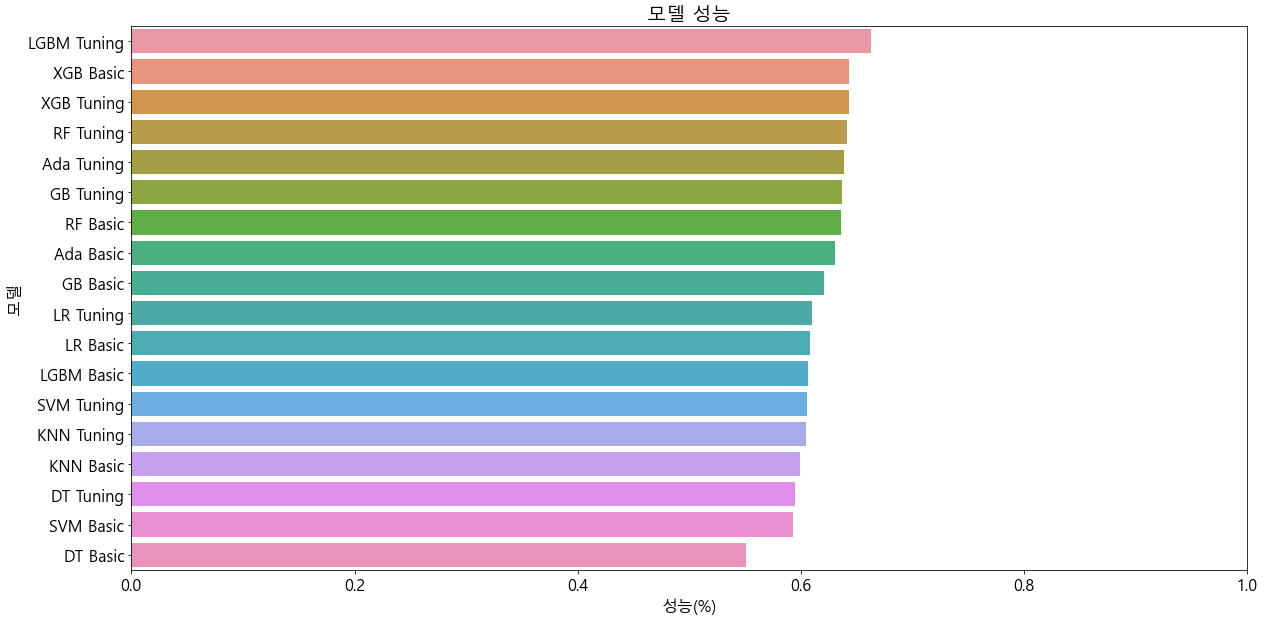

In [16]:
dict1 = {
    'Model' : result_name,
    'Score' : result_list
}

results_df = pd.DataFrame(dict1)

results_df.sort_values('Score', ascending=False, inplace=True)

results_df.reset_index(drop=True, inplace=True)

sns.barplot(data=results_df, x='Score', y='Model')
plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

### 최종 평가를 수행한다.

In [17]:
# 학습용과 검증용으로 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# 기본 모델과 튜닝된 모델이 담긴 리스트를 합친 새로운 리스트를 생성한다.
total_model = model_list + tuning_model

In [19]:
# 학습용 데이터를 학습한다.
for m1 in total_model :
    m1.fit(X_train, y_train)

In [20]:
# 학습용 데이터를 통해 결과를 예측한다.
pred_list = []

for m1 in total_model :
    pred = m1.predict(X_train)
    pred_list.append(pred)

In [21]:
# 평가

# 평가 결과를 담을 딕셔너리
dict1 = {
    'accuracy' : [],
    'precision' : [],
    'recall' : [],
    'f1' : [],
    'roc_auc' : [],
    'name' : []
}

# 각 모델별 예측 결과를 하나씩 추출하여 평가한다.
for idx, p1 in enumerate(pred_list) :
    
    r1 = accuracy_score(y_train, p1)
    r2 = precision_score(y_train, p1)
    r3 = recall_score(y_train, p1)
    r4 = f1_score(y_train, p1)
    r5 = roc_auc_score(y_train, p1)
    
    dict1['accuracy'].append(r1)
    dict1['precision'].append(r2)
    dict1['recall'].append(r3)
    dict1['f1'].append(r4)
    dict1['roc_auc'].append(r5)
    dict1['name'].append(result_name[idx])

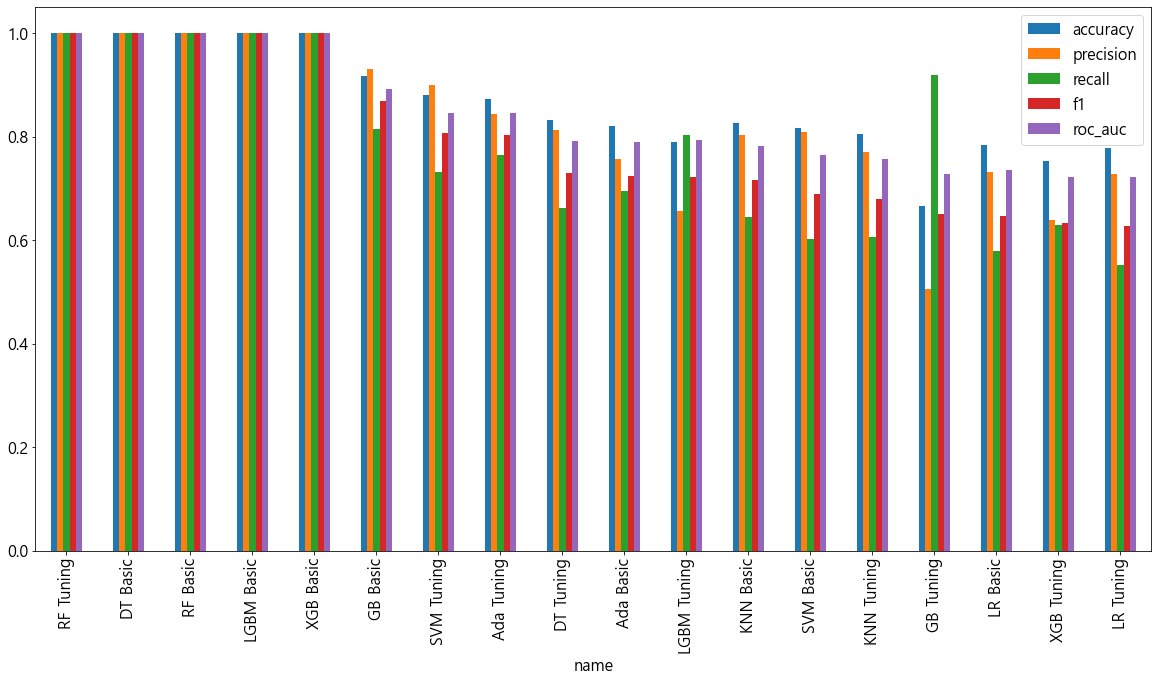

In [22]:
# 시각화
df100 = pd.DataFrame(dict1)
df100.set_index('name', inplace=True)
df100.sort_values('f1', ascending=False, inplace=True)

df100.plot.bar()
plt.show()

교차검증시 매우 좋지 않게 나왔고 학습 데이터에 대한 평가가 높게 나온 것으로 보아 과적합이 발생한 것으로 추축해 볼 수 있다. 만약 이후에 검증 데이터에 대한 평가가 나쁘게 나온다면 이 프로젝트는 접어야 한다.

In [23]:
# 검증용 데이터를 통해 결과를 예측한다.
pred_list = []

for m1 in total_model :
    pred = m1.predict(X_test)
    pred_list.append(pred)

In [24]:
# 평가

# 평가 결과를 담을 딕셔너리
dict1 = {
    'accuracy' : [],
    'precision' : [],
    'recall' : [],
    'f1' : [],
    'roc_auc' : [],
    'name' : []
}

# 각 모델별 예측 결과를 하나씩 추출하여 평가한다.
for idx, p1 in enumerate(pred_list) :
    
    r1 = accuracy_score(y_test, p1)
    r2 = precision_score(y_test, p1)
    r3 = recall_score(y_test, p1)
    r4 = f1_score(y_test, p1)
    r5 = roc_auc_score(y_test, p1)
    
    dict1['accuracy'].append(r1)
    dict1['precision'].append(r2)
    dict1['recall'].append(r3)
    dict1['f1'].append(r4)
    dict1['roc_auc'].append(r5)
    dict1['name'].append(result_name[idx])

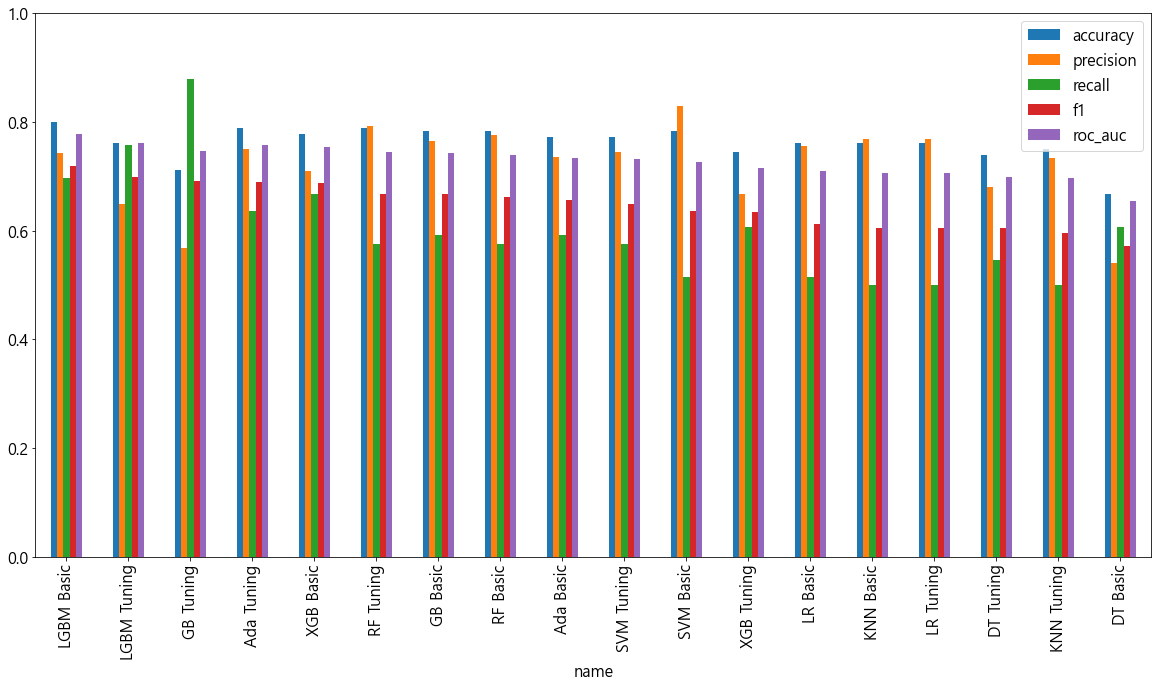

In [26]:
# 시각화
df100 = pd.DataFrame(dict1)
df100.set_index('name', inplace=True)
df100.sort_values('f1', ascending=False, inplace=True)

df100.plot.bar()
plt.ylim(0, 1)
plt.show()

그나마 LGBM Basic이 제일 났기 때문에 이를 통해 결과를 예측한다.

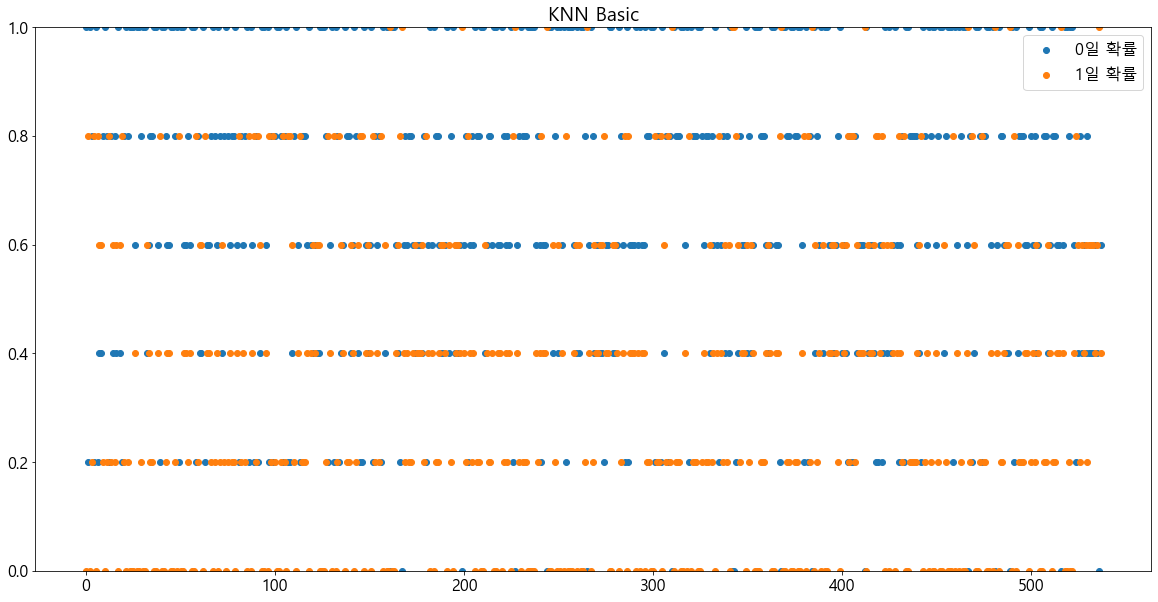

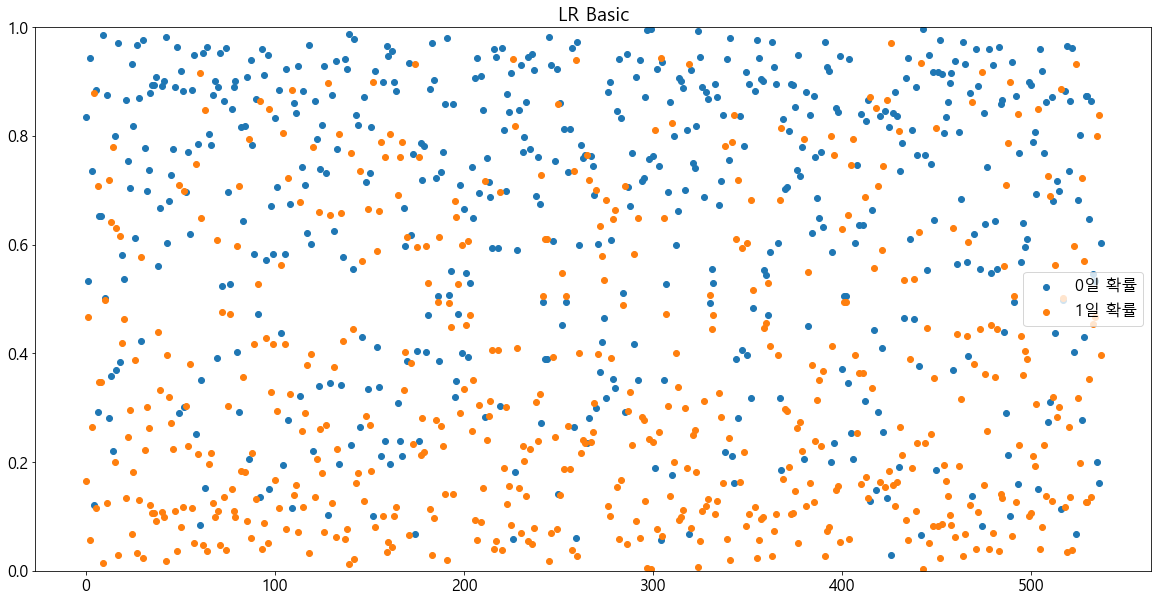

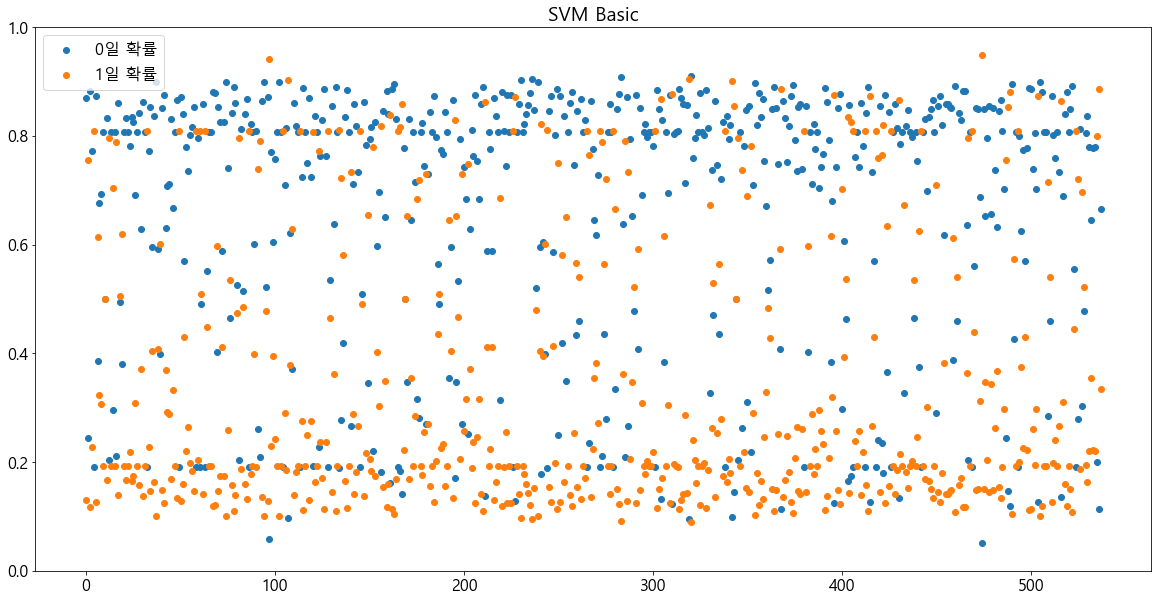

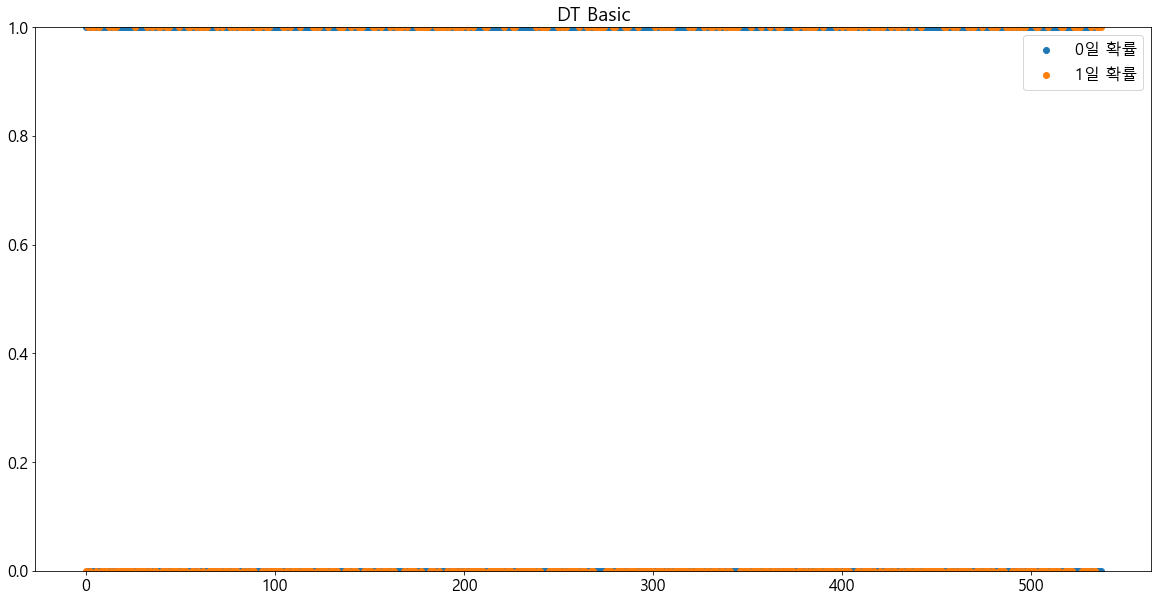

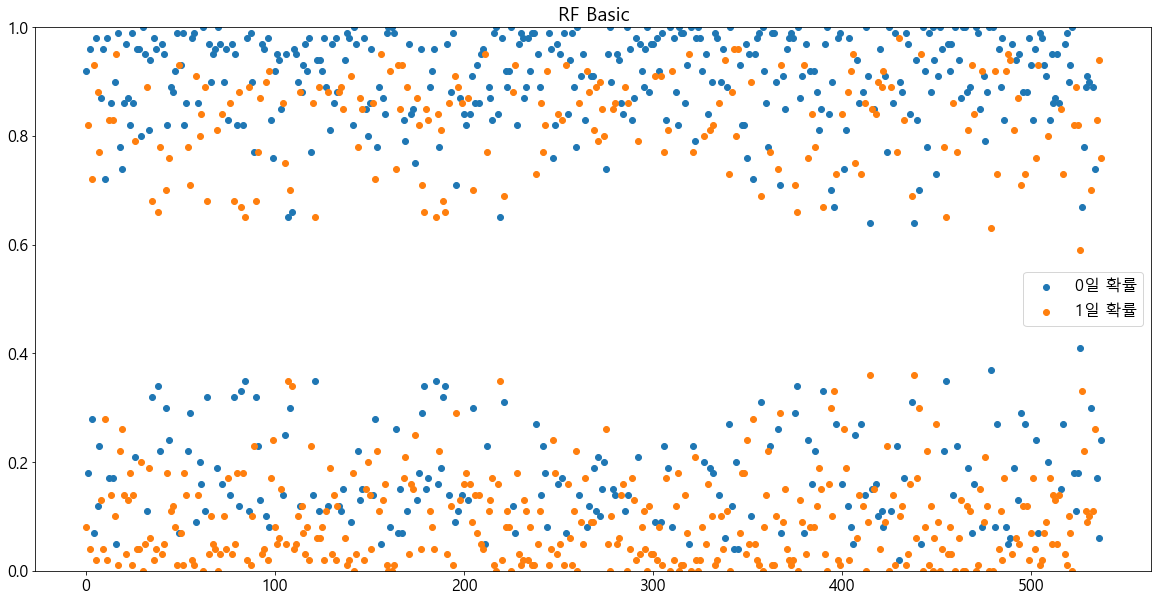

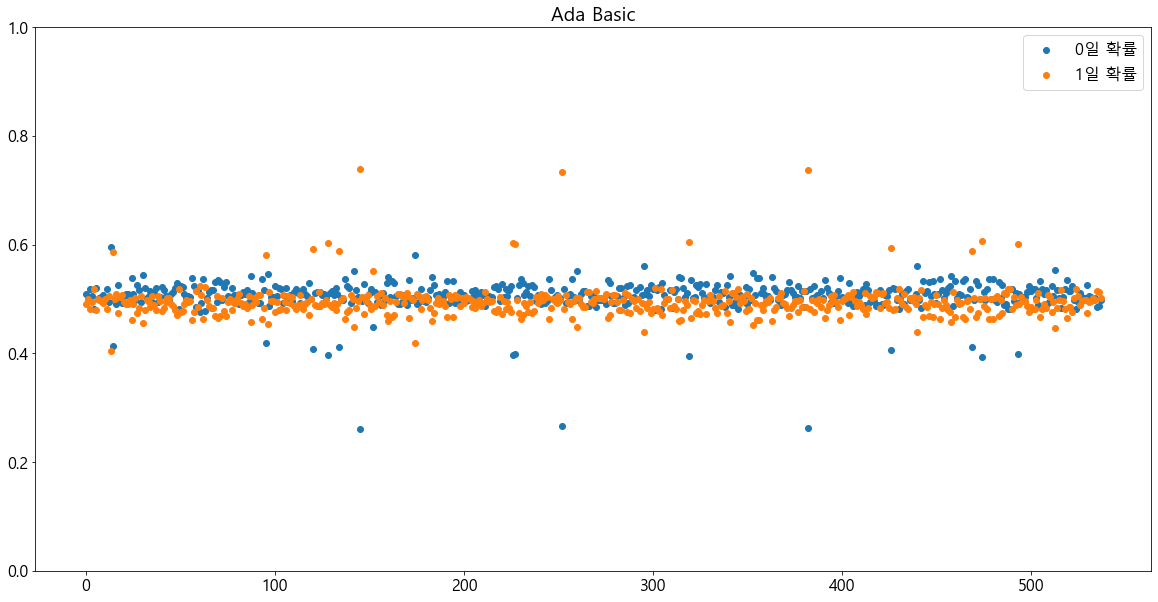

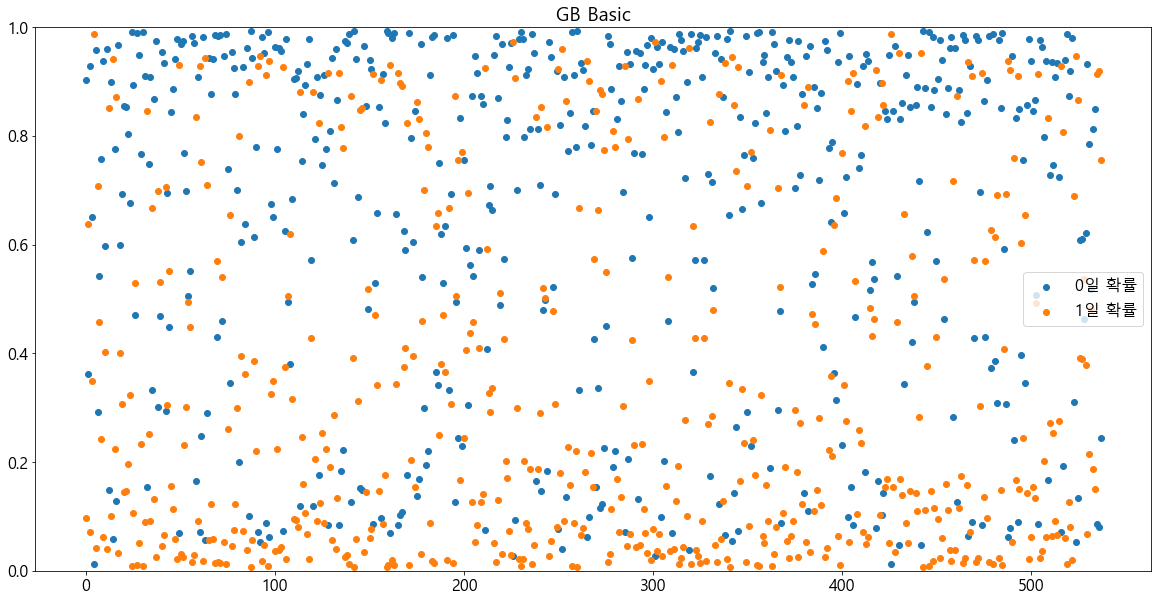

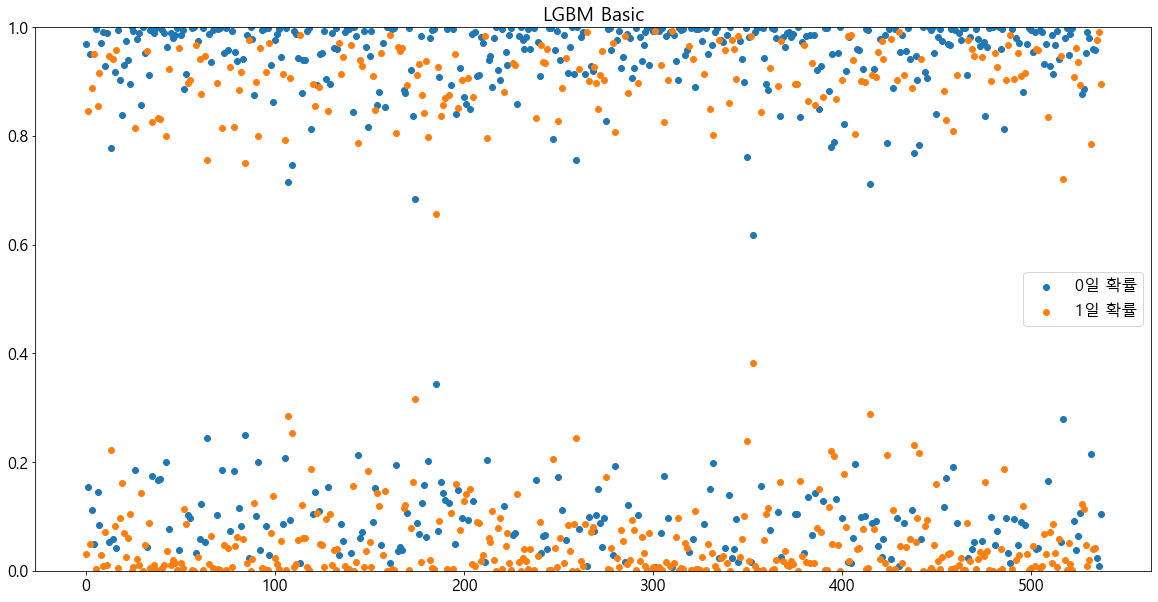

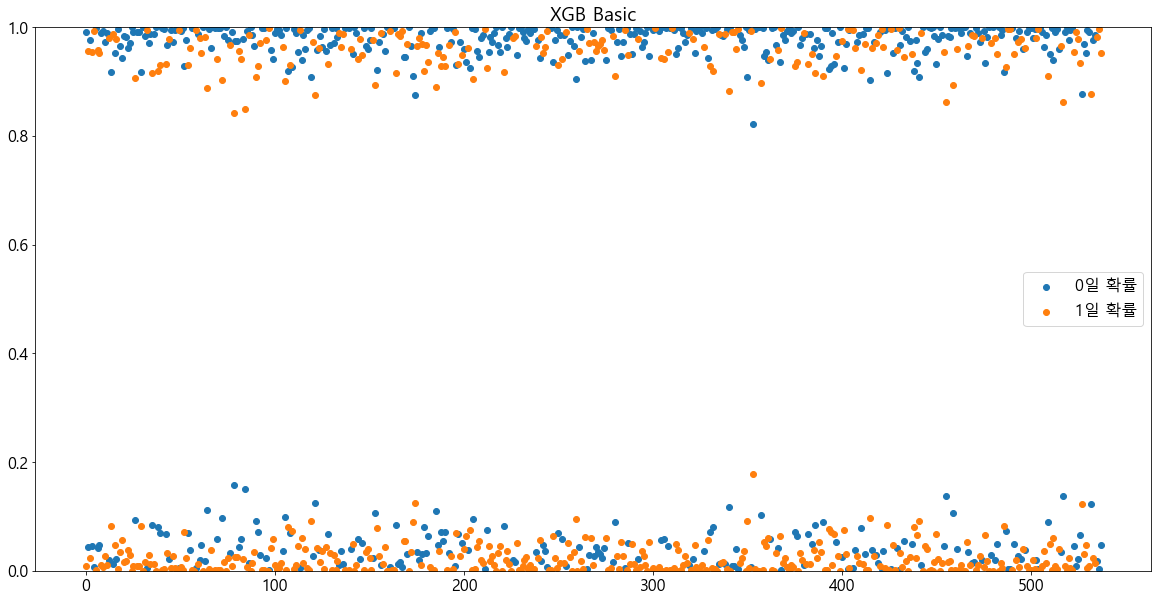

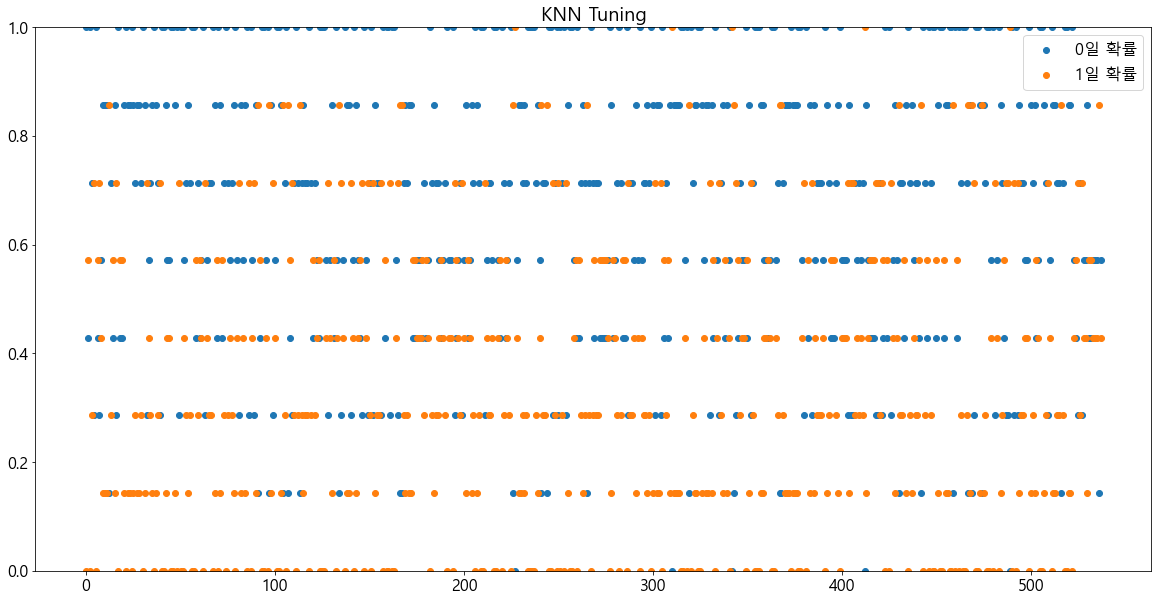

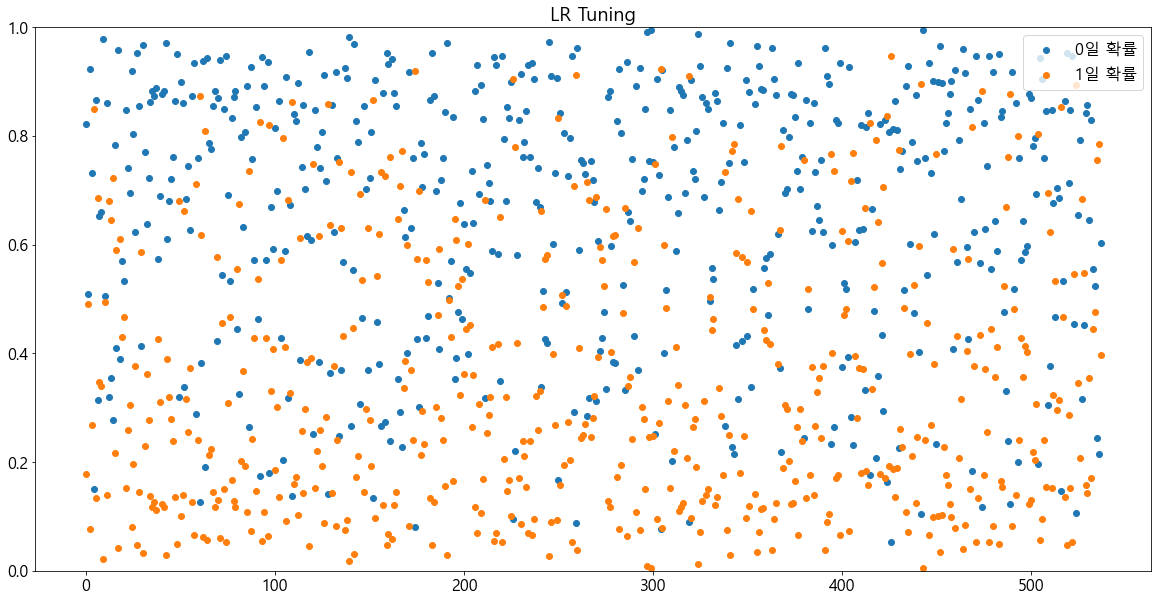

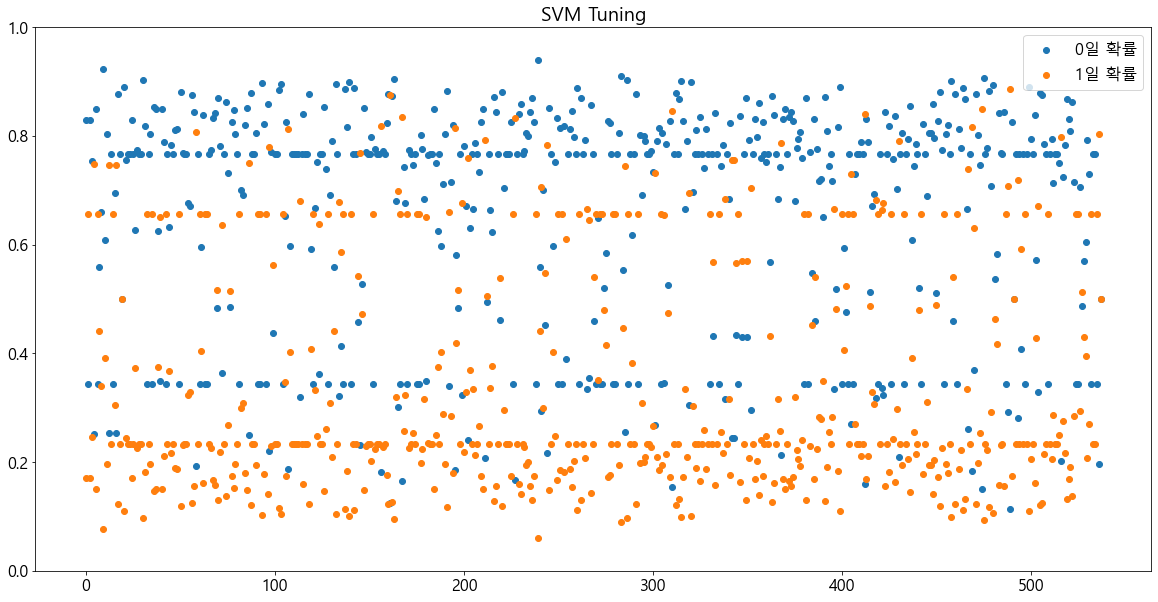

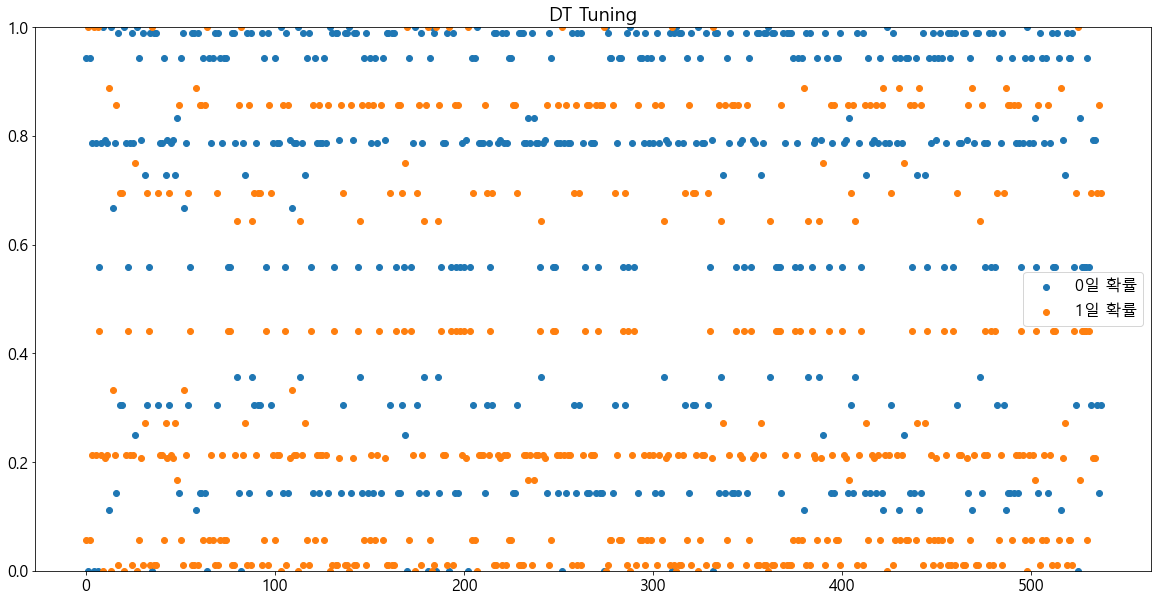

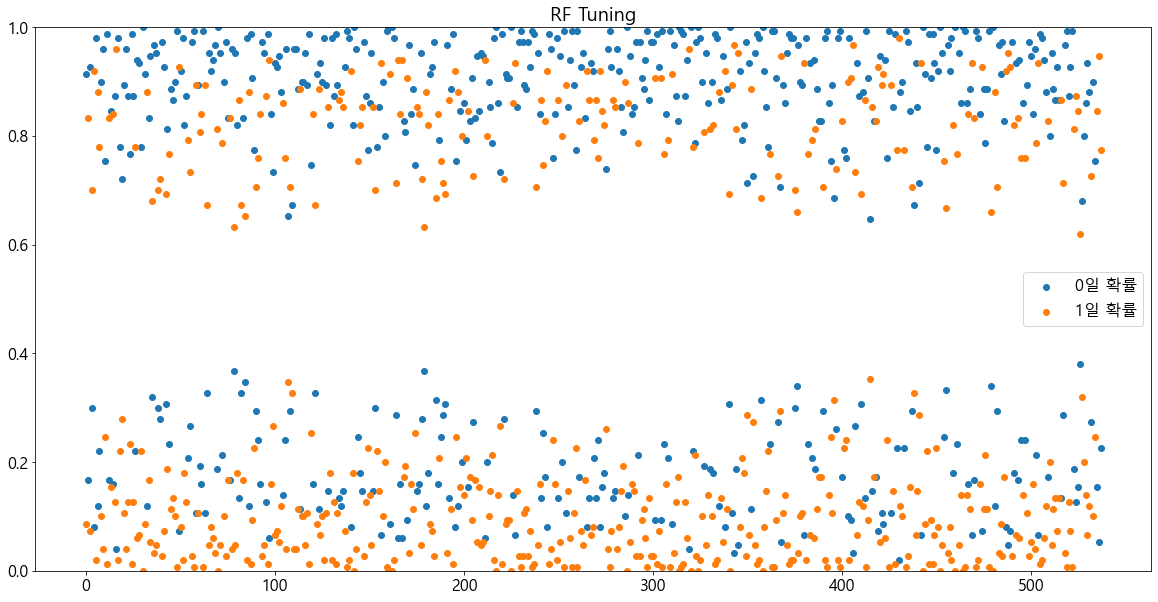

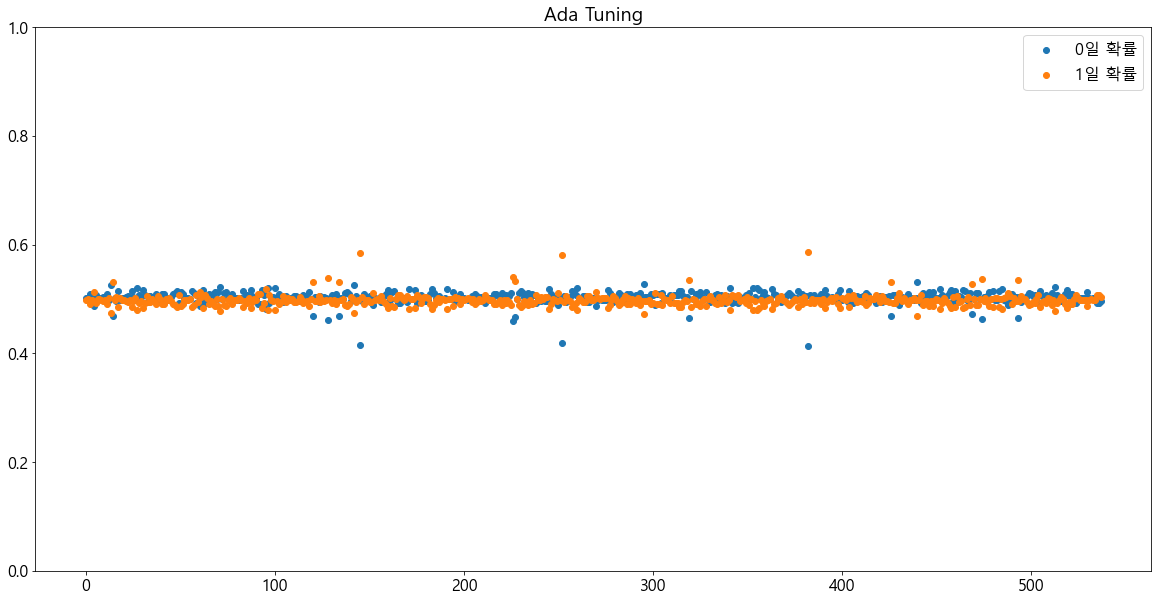

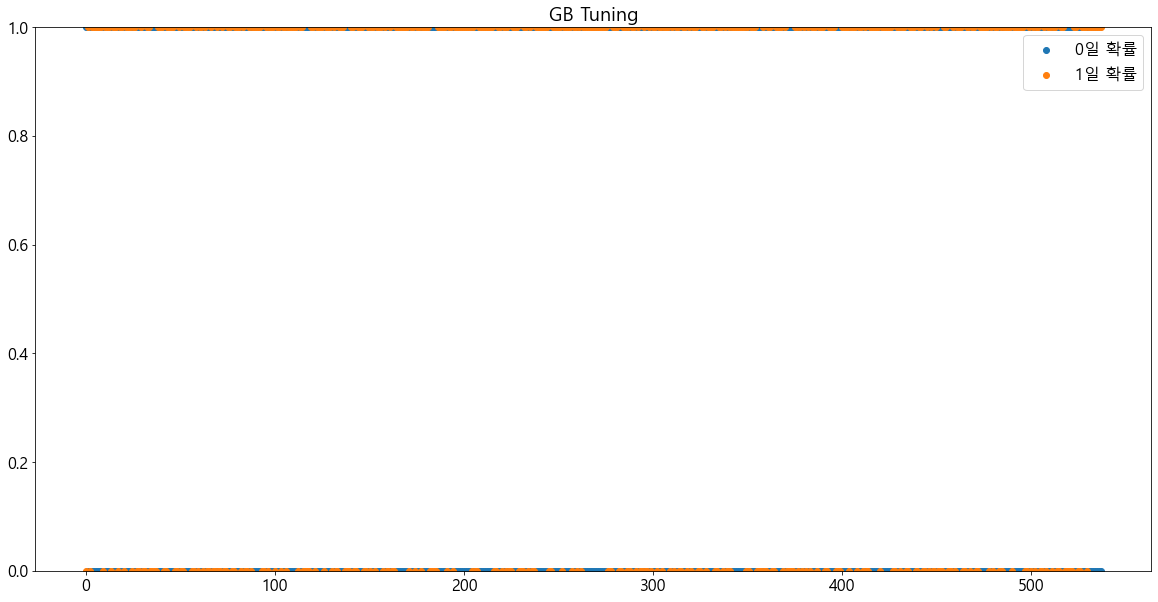

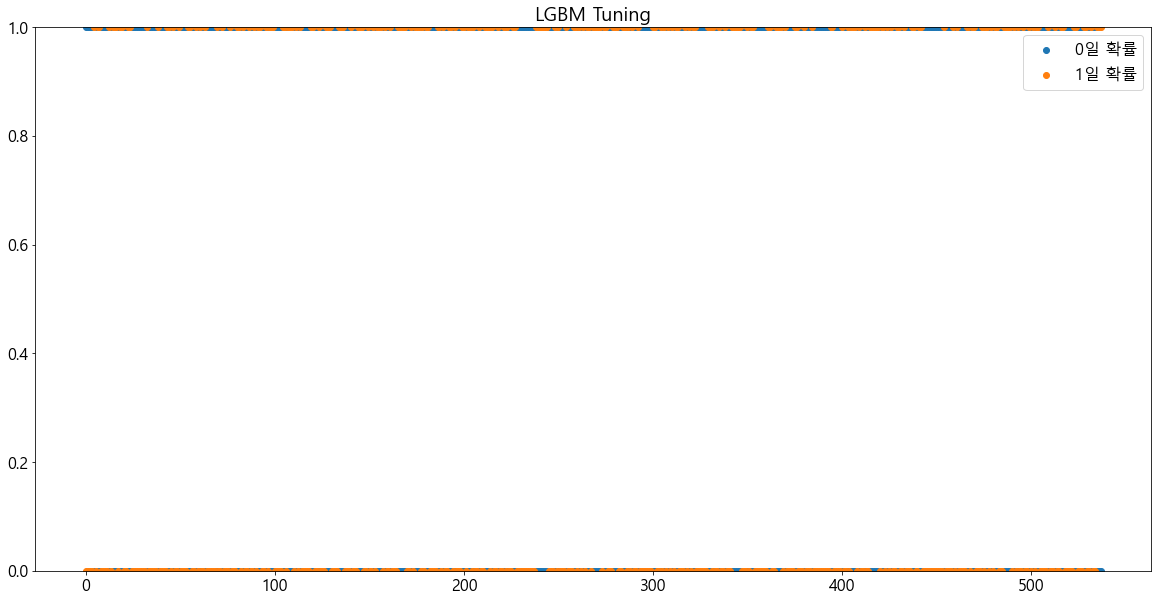

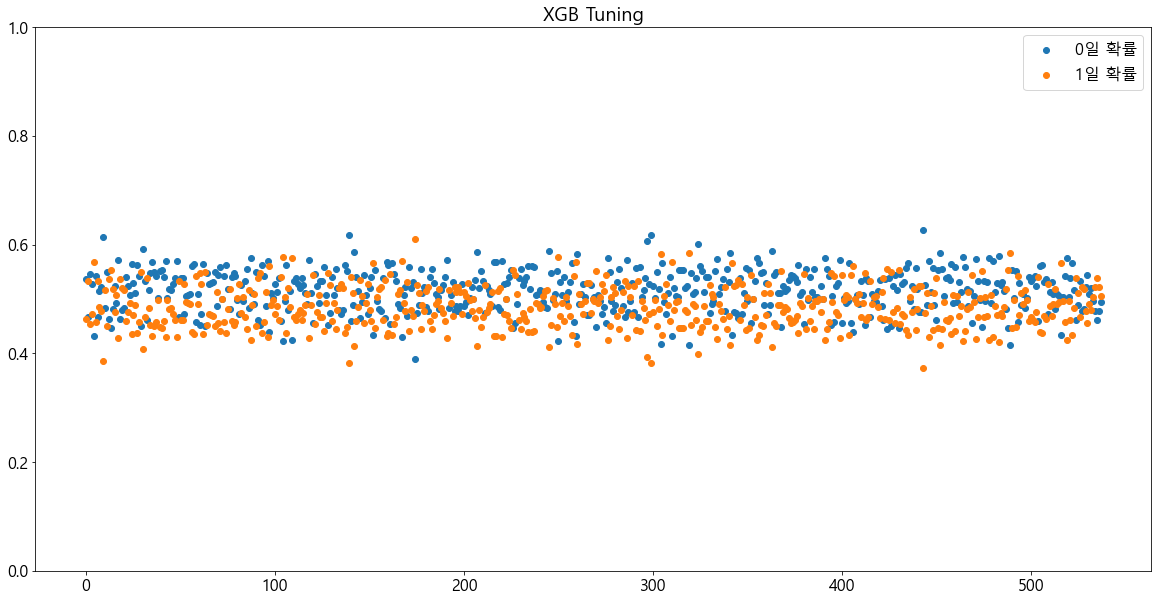

In [27]:
# 학습 데이터에 대한 확률 그래프
for idx, m1 in enumerate(total_model) :  
    proba1 = m1.predict_proba(X_train)

    # 0일 확률
    a10 = proba1[:, 0]
    # 1일 확률
    a11 = proba1[:, 1]

    plt.scatter(list(range(len(a10))), a10, label='0일 확률')
    plt.scatter(list(range(len(a11))), a11, label='1일 확률')
    plt.title(result_name[idx])
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

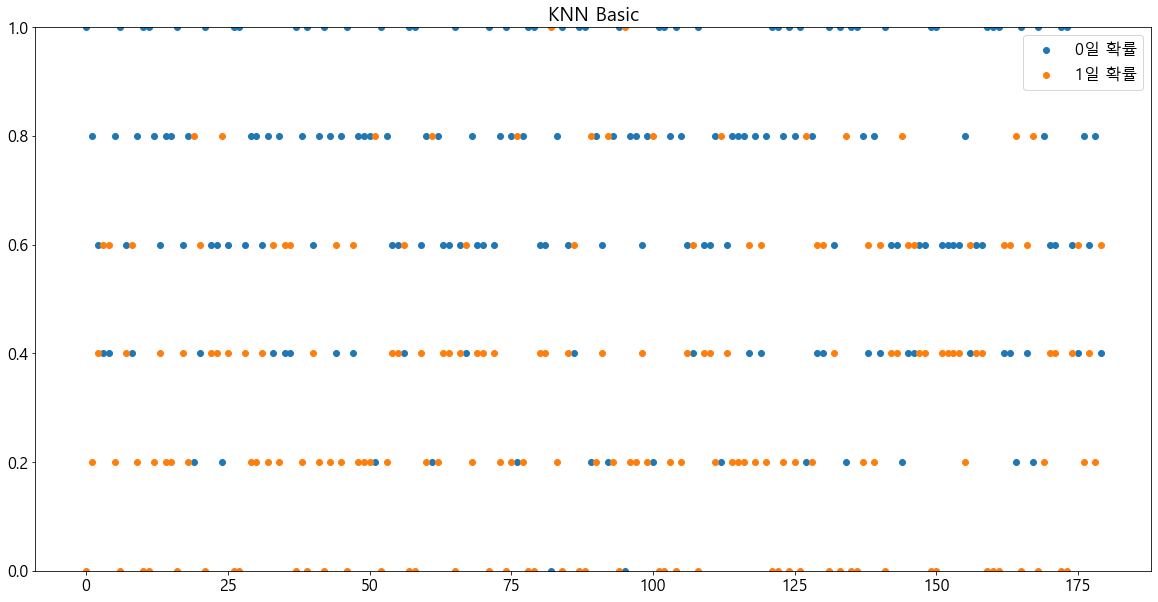

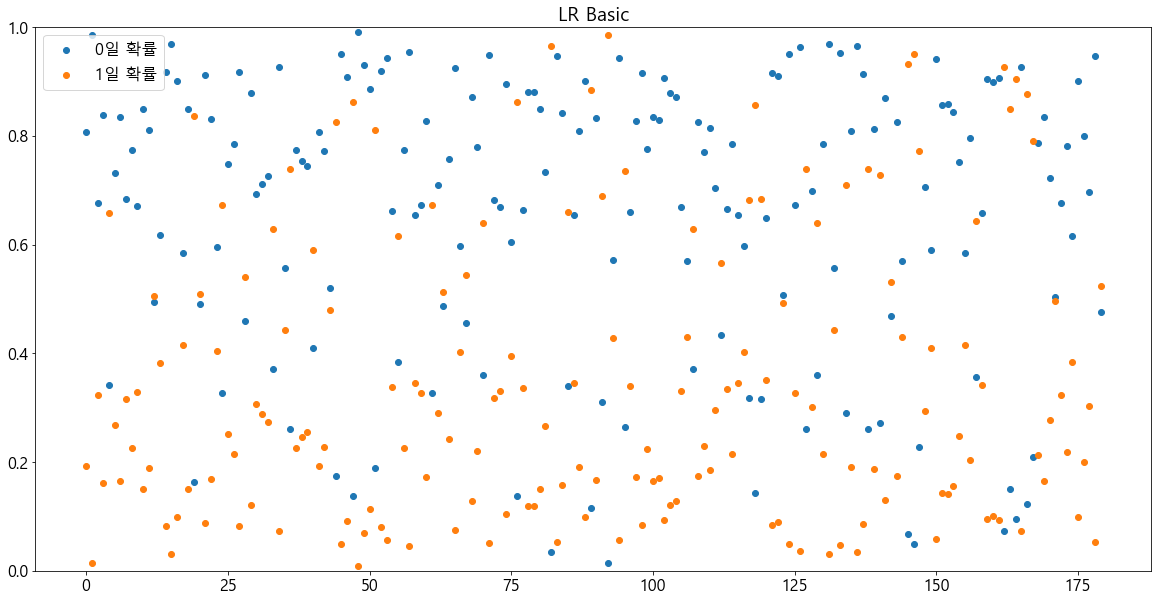

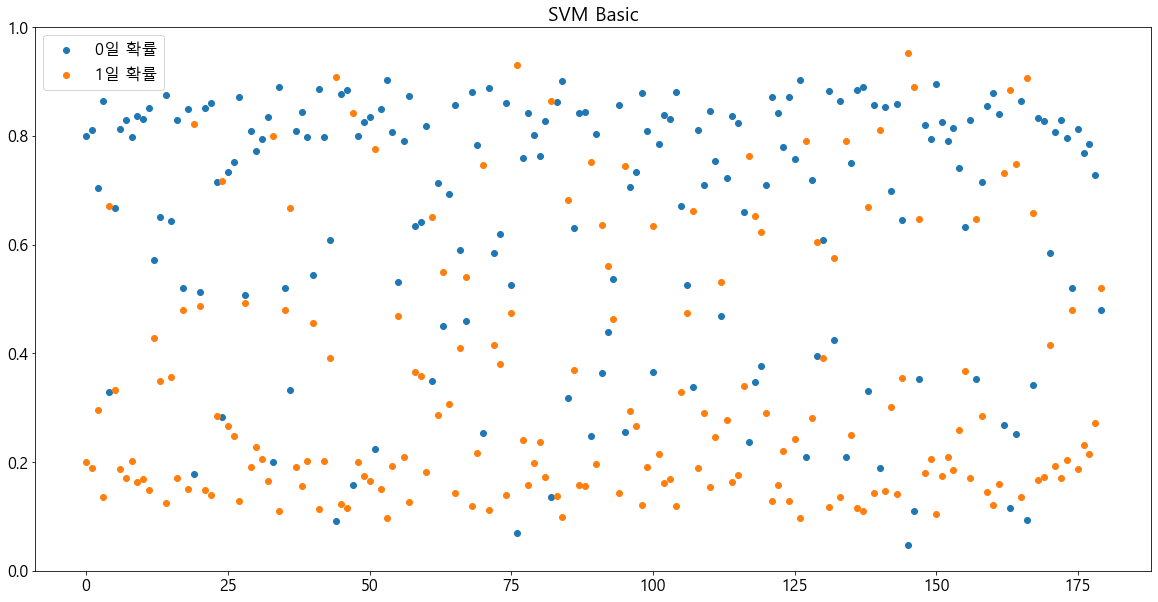

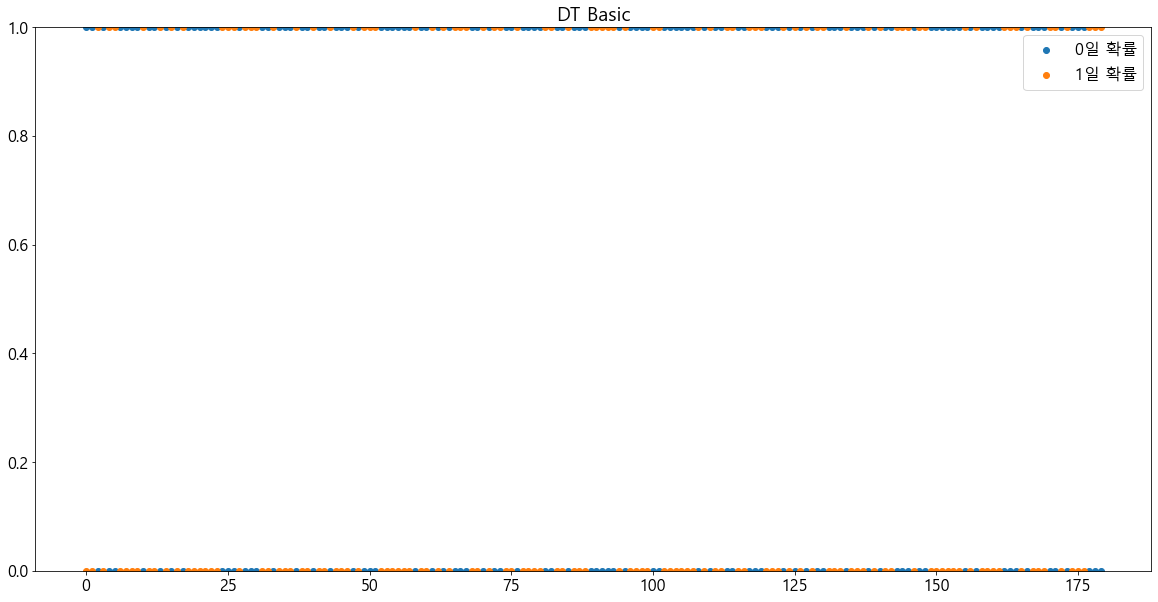

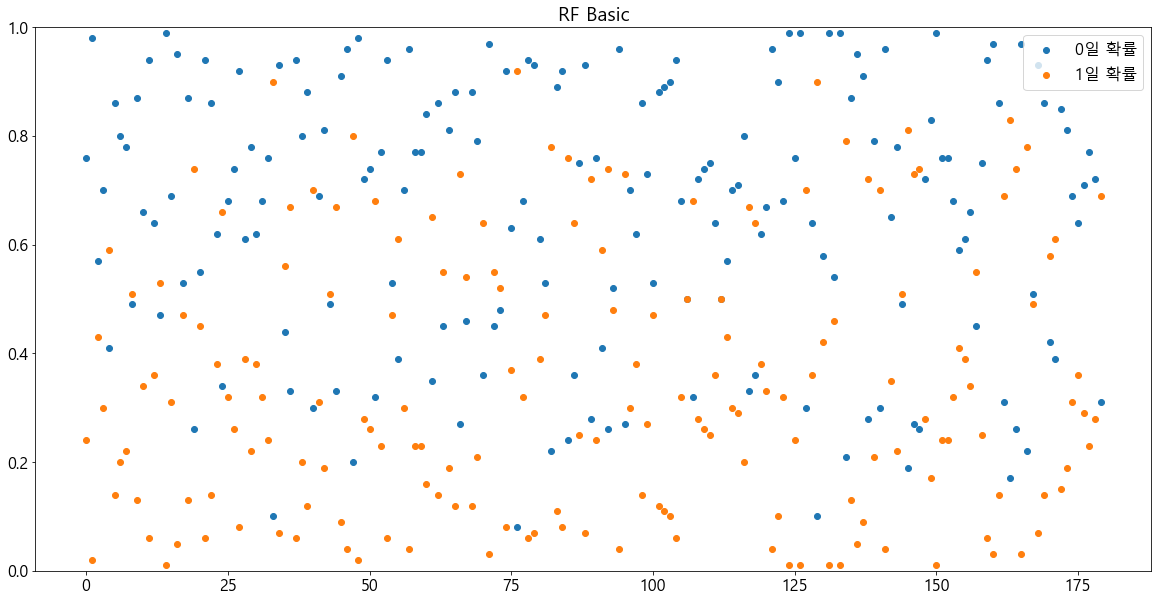

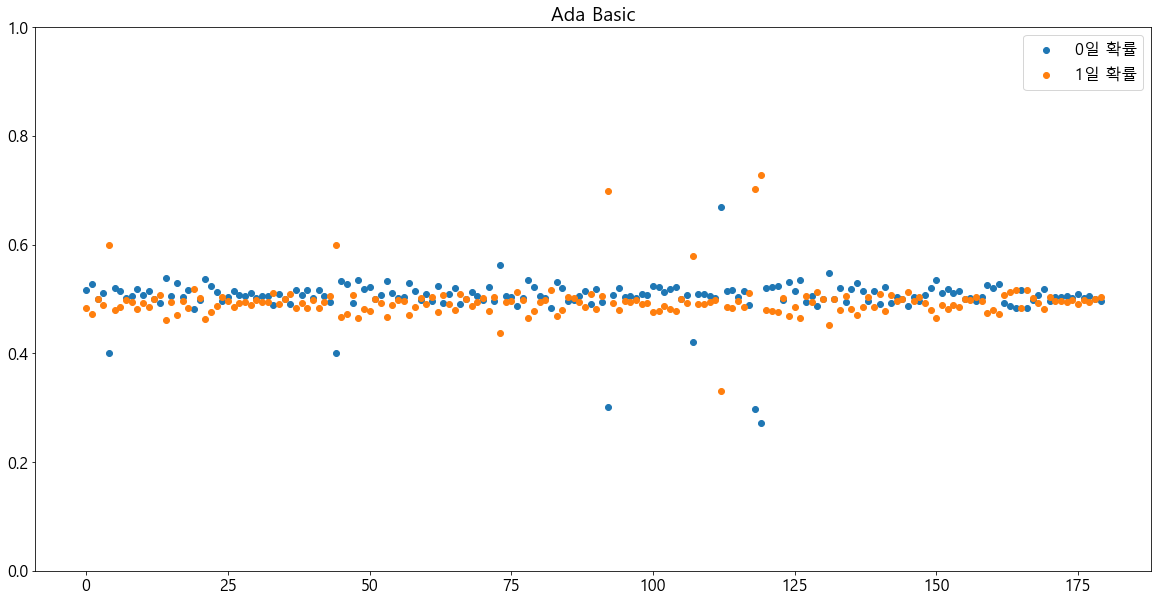

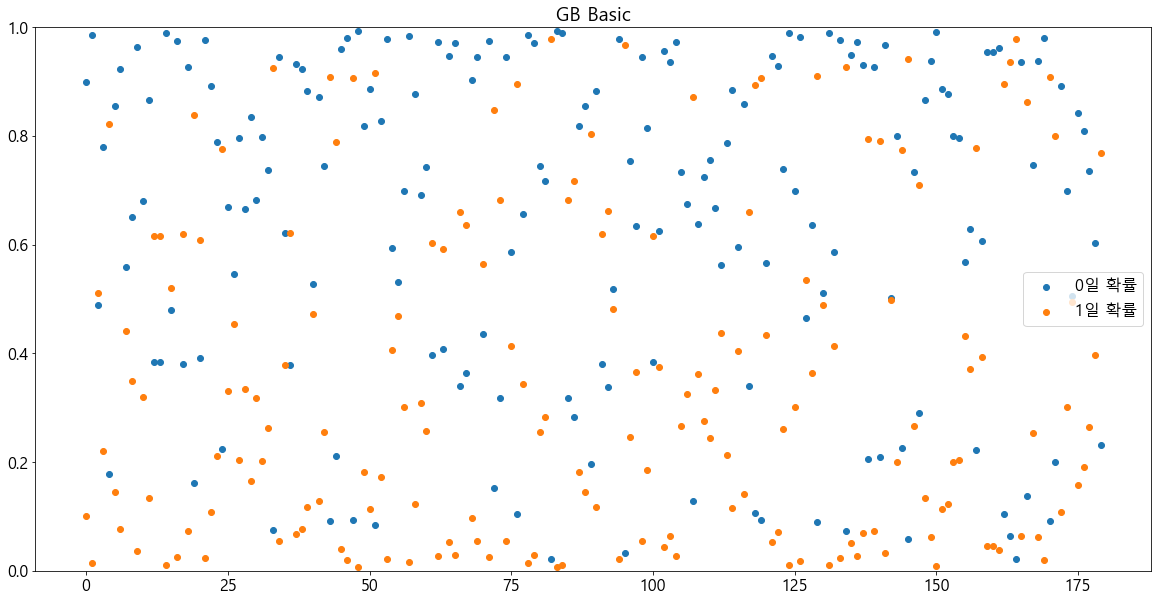

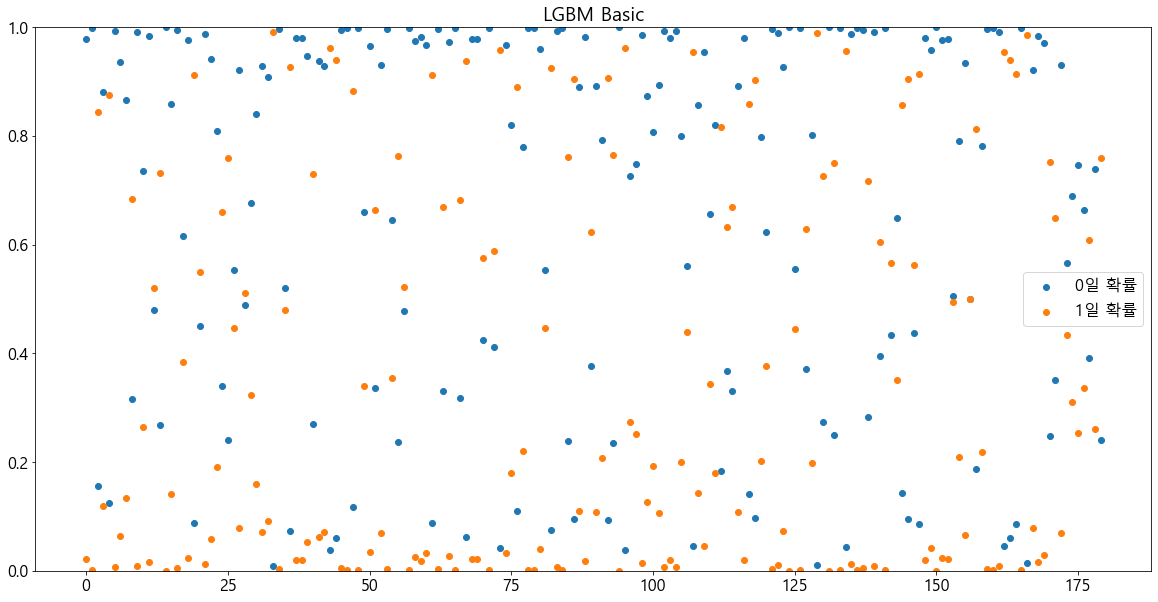

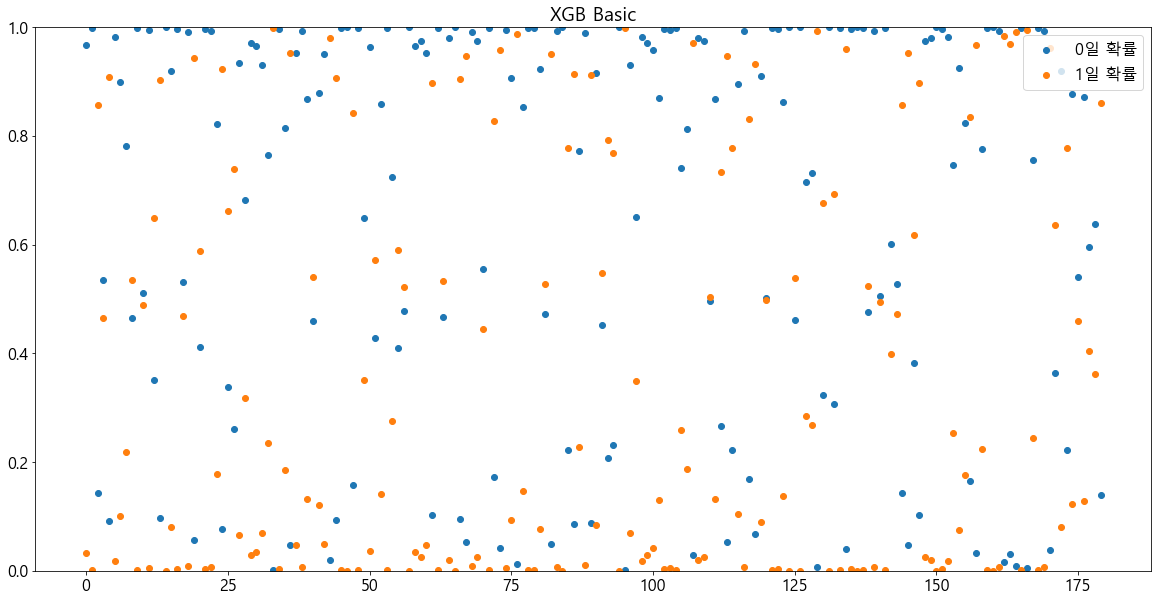

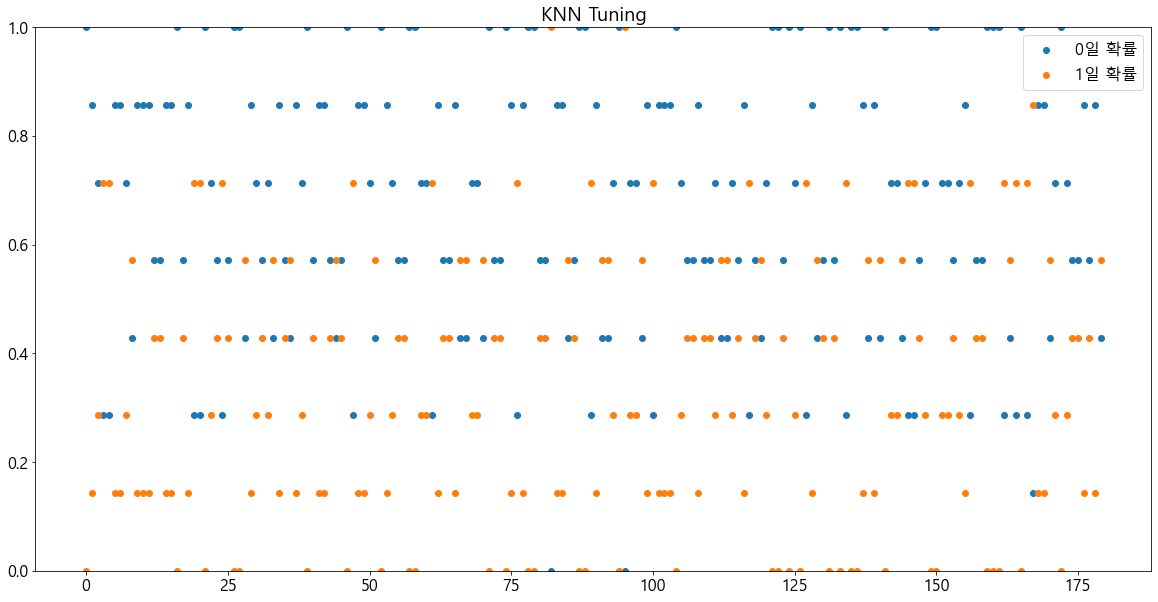

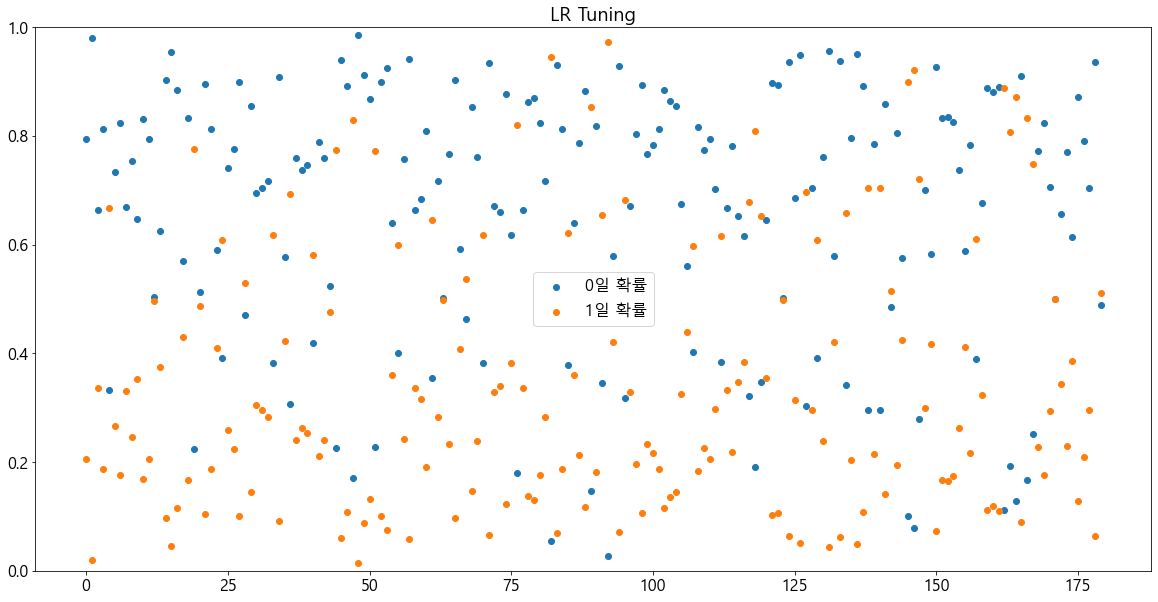

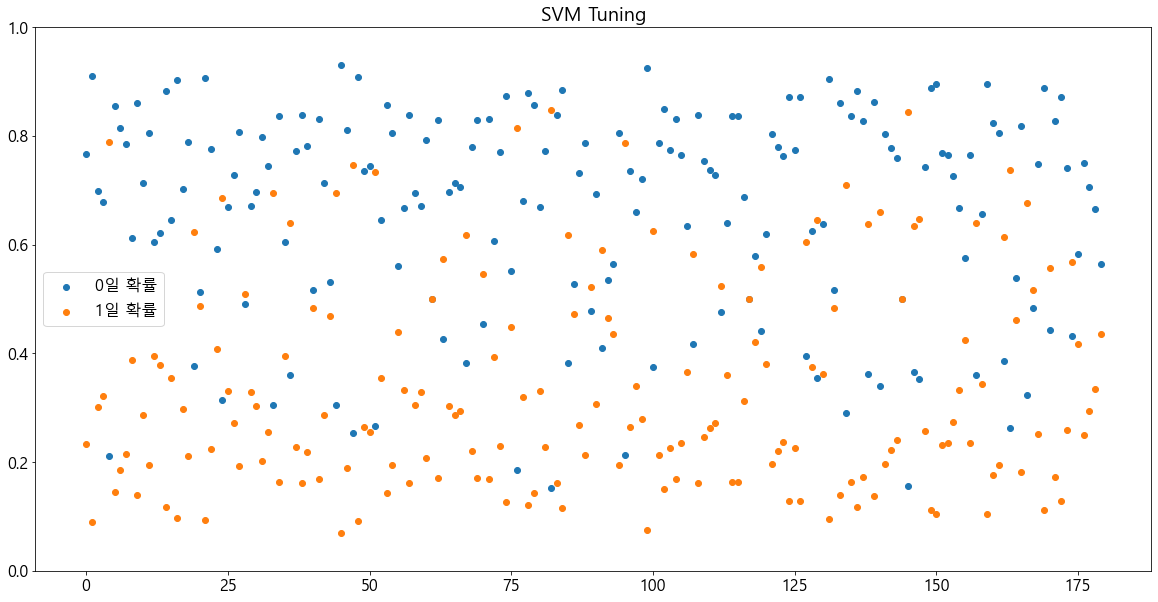

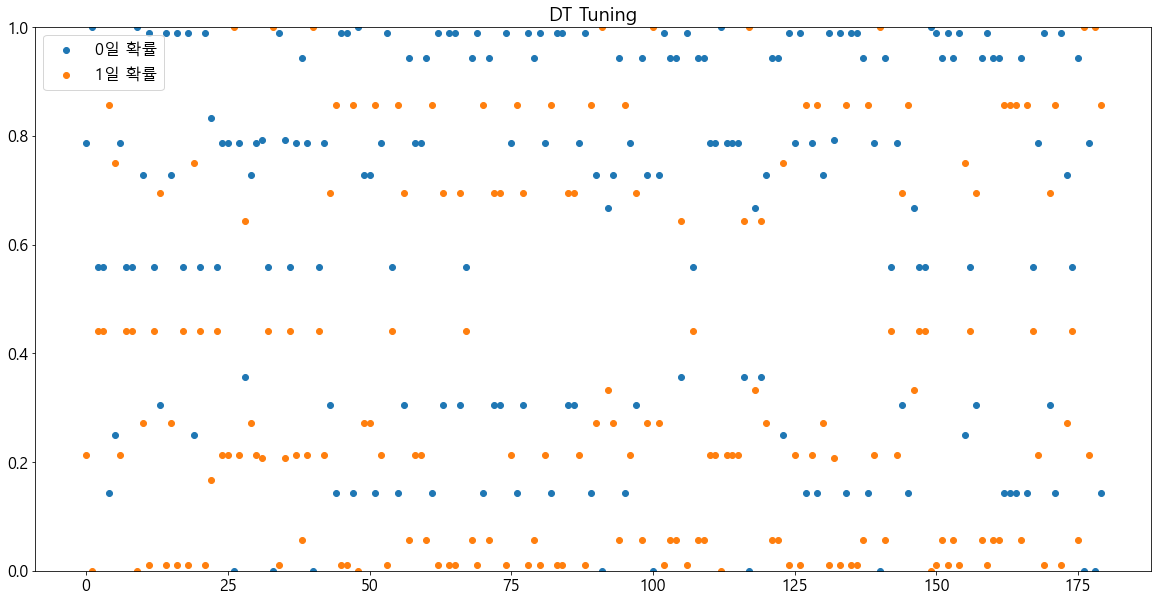

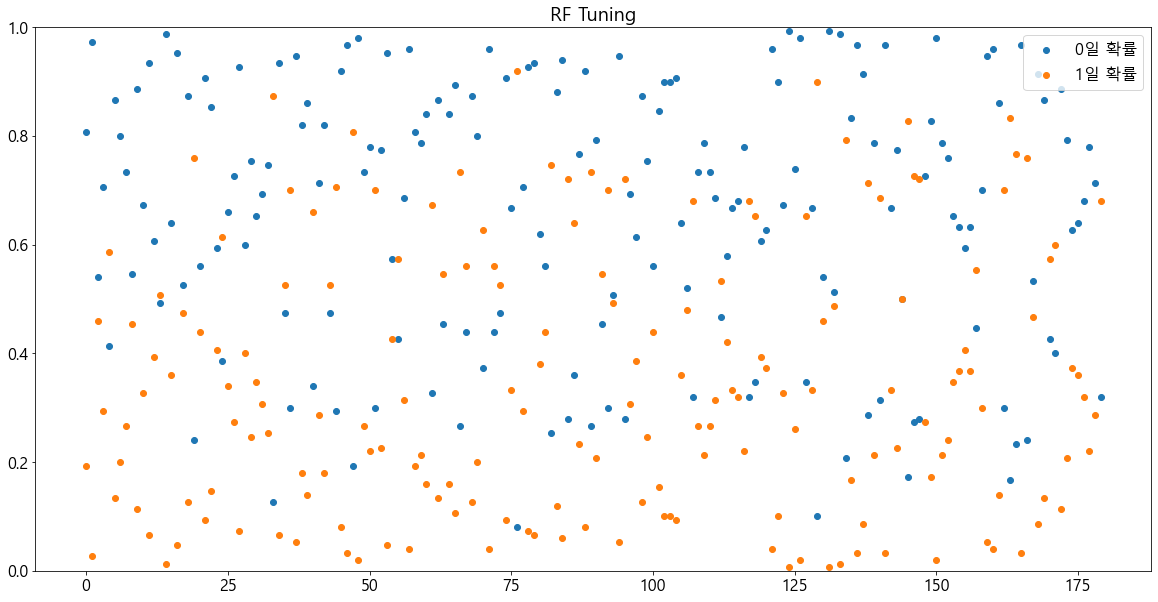

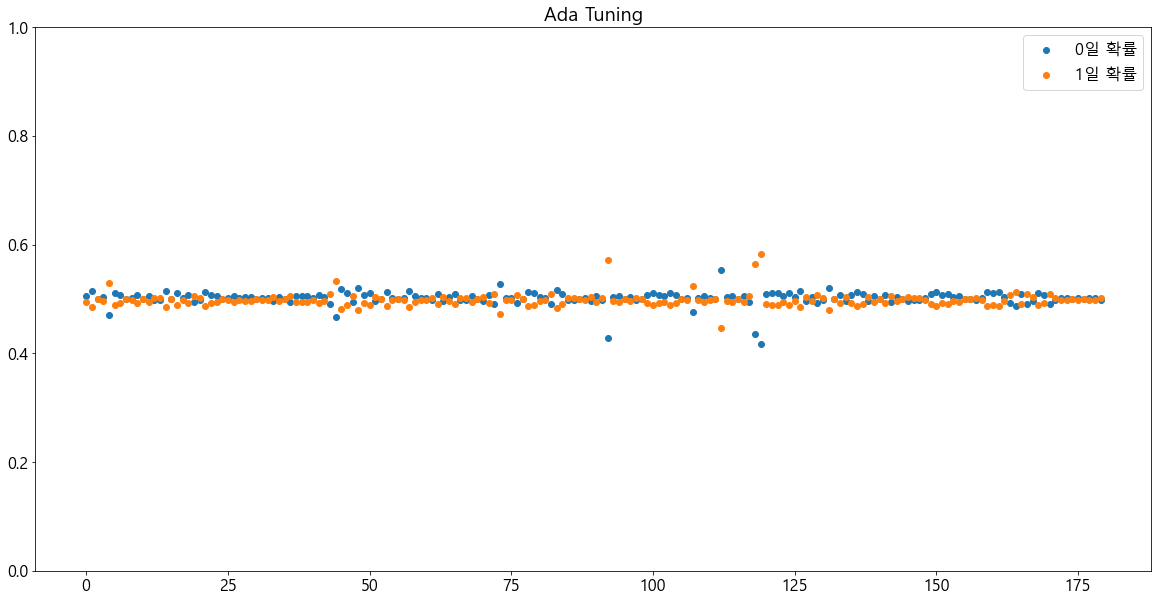

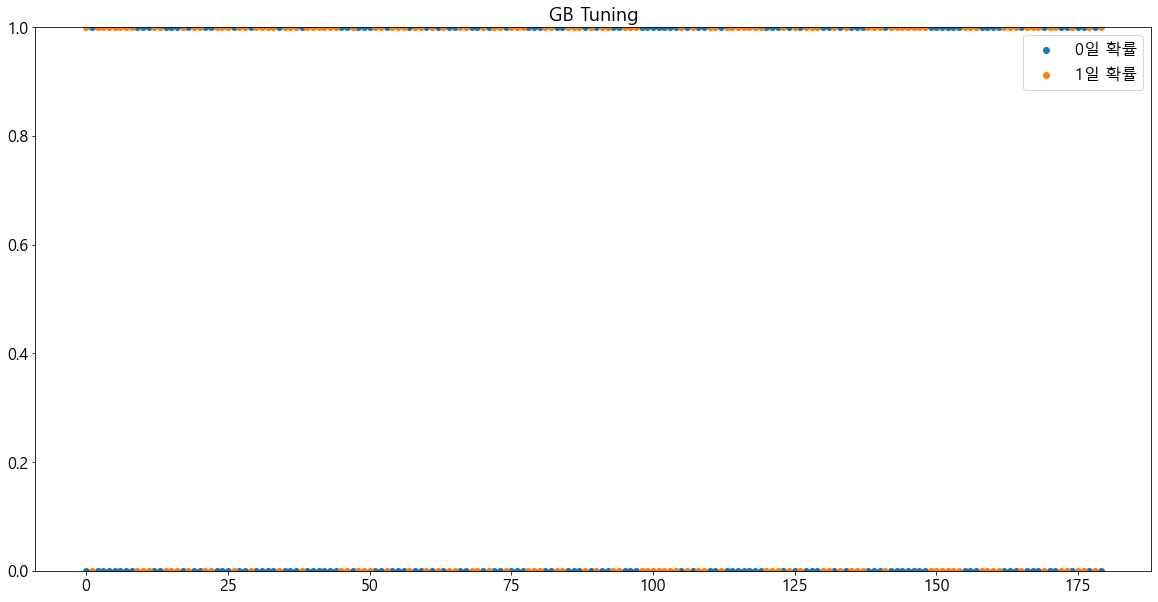

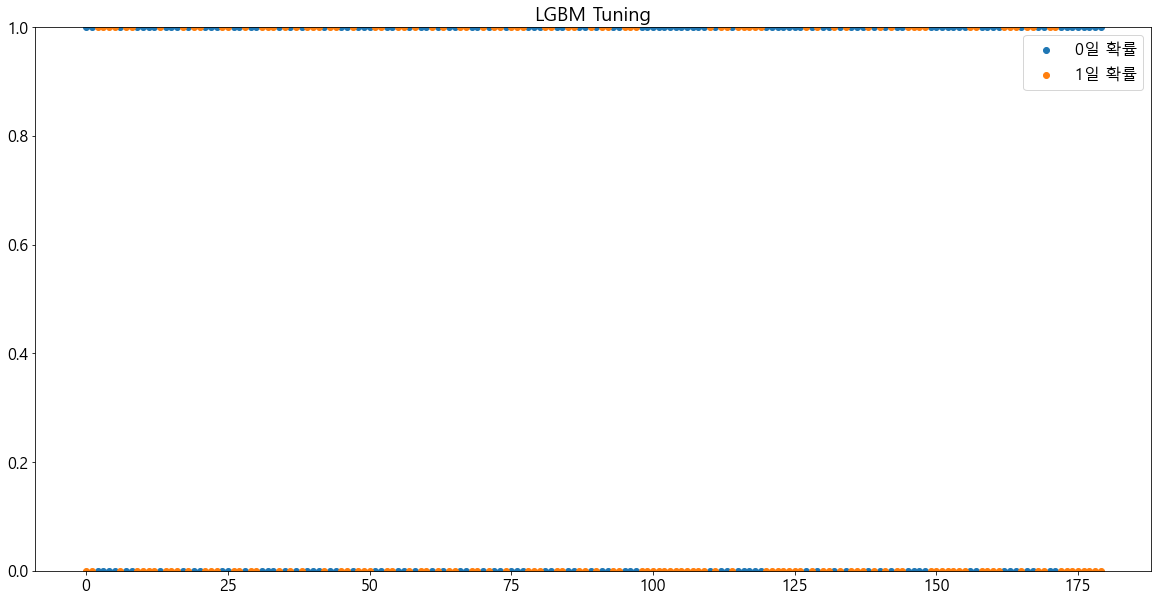

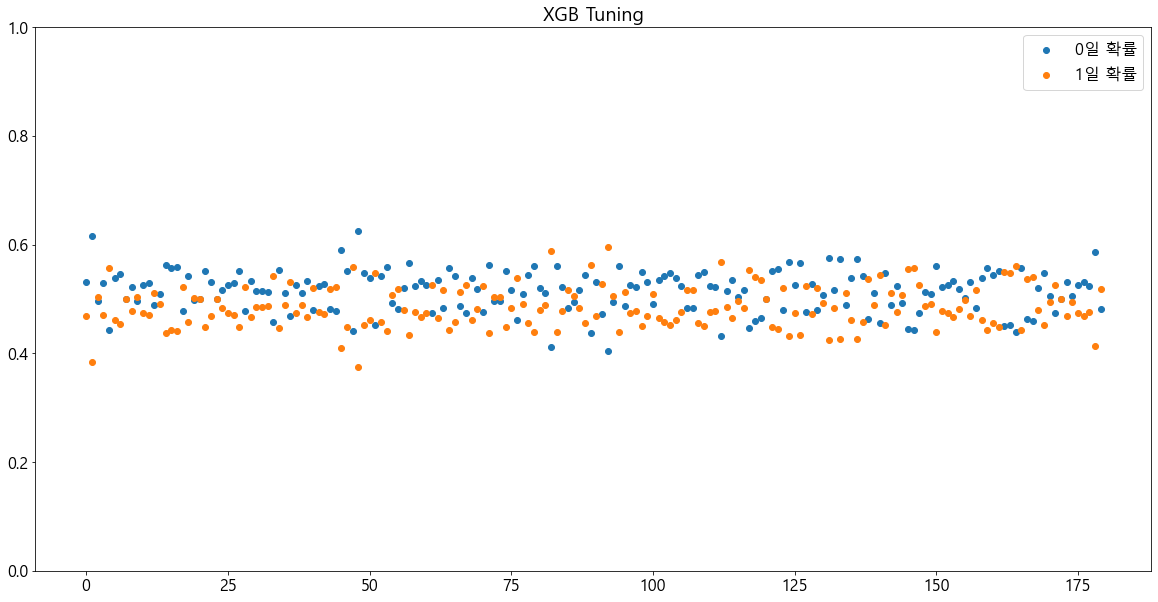

In [28]:
# 검증 데이터에 대한 확률 그래프
for idx, m1 in enumerate(total_model) :  
    proba1 = m1.predict_proba(X_test)

    # 0일 확률
    a10 = proba1[:, 0]
    # 1일 확률
    a11 = proba1[:, 1]

    plt.scatter(list(range(len(a10))), a10, label='0일 확률')
    plt.scatter(list(range(len(a11))), a11, label='1일 확률')
    plt.title(result_name[idx])
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

### 검증용 데이터로 평가한 결과.
- 모든 학습 모델의 성능 지표가 모두 0.8 이하이다.
- 결과가 매우 않좋기 때문에 추가적으로 데이터를 더 확보하거나 다른 처리를 추가하거나 접어야 한다.
- 그러나 우리는 지금 공부하고 있기 때문에 LGBM Tuning을 사용한다.

### 선정된 모델에 전체 데이터를 학습시킨다.

In [31]:
best_model = tuning_model[7]

best_model.fit(X, y)

LGBMClassifier(learning_rate=10000, n_estimators=50, random_state=1)

### 예측한다.

In [32]:
df2 = pd.read_excel('data/머신러닝과제 예측데이터.xlsx')
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,108,60,46,178,35.5,0.415,24
1,5,97,76,27,0,35.6,0.378,52
2,4,83,86,19,0,29.3,0.317,34
3,1,114,66,36,200,38.1,0.289,21
4,1,149,68,29,127,29.3,0.349,42
5,5,117,86,30,105,39.1,0.251,42
6,1,111,94,0,0,32.8,0.265,45
7,4,112,78,40,0,39.4,0.236,38
8,1,116,78,29,180,36.1,0.496,25
9,0,141,84,26,0,32.4,0.433,22


In [33]:
# 표준화
X = scaler1.transform(df2)
X

array([[-0.84778553, -0.39737552, -0.44260555,  1.60420098,  0.83514604,
         0.45536237, -0.17887642, -0.77947825],
       [ 0.34226337, -0.73959249,  0.36989885,  0.41340167, -0.69365831,
         0.46790843, -0.28915027,  1.60425019],
       [ 0.04475114, -1.17514136,  0.8777141 , -0.08798752, -0.69365831,
        -0.32249301, -0.4709531 ,  0.07185333],
       [-0.84778553, -0.21071171, -0.1379164 ,  0.9774645 ,  1.02409938,
         0.78155979, -0.55440358, -1.03487773],
       [-0.84778553,  0.87816046, -0.03635335,  0.53874896,  0.39711783,
        -0.32249301, -0.37558112,  0.75291861],
       [ 0.34226337, -0.11737981,  0.8777141 ,  0.60142261,  0.20816448,
         0.90702034, -0.6676578 ,  0.75291861],
       [-0.84778553, -0.30404362,  1.2839663 , -1.27878683, -0.69365831,
         0.1166189 , -0.62593256,  1.00831808],
       [ 0.04475114, -0.27293298,  0.4714619 ,  1.22815909, -0.69365831,
         0.9446585 , -0.71236341,  0.41238597],
       [-0.84778553, -0.14849045

In [34]:
# 예측한다.
y_pred1 = best_model.predict(X)

In [36]:
# 저장한다.
df2['target'] = y_pred1
df2.to_excel('data/머신러닝과제 예측데이터 결과.xlsx')